Grupo 11

Johan Ariel Verjan Carrillo
Wilkyn Julián Vargas Bahamón


---

Minería de Datos


---

Dataset: Adult Income(Predicción de Ingresos mayores a 50k)


---




In [94]:
#Importar Librerias
import pandas as pd                 # Manejo de datos en forma de DataFrame
import numpy as np                  # Operaciones numéricas eficientes
import matplotlib.pyplot as plt     # Librería para gráficos básicos
import seaborn as sns               # Librería para gráficos estadísticos
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler  # Codificación y normalización
from sklearn.model_selection import train_test_split          # División de datos en entrenamiento y prueba
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import shapiro
import warnings
warnings.filterwarnings('ignore')


Importar Datos

In [95]:

# Nombres de columnas según adult.names
columnas = [
    'Edad',
    'Tipo_trabajo',
    'Peso_censal',
    'Educación',
    'num_Educacion',
    'Estado_Civil',
    'Ocupación',
    'Relación_familiar',
    'Étnia',
    'Sexo',
    'Ganancia_Capital',
    'Pérdida_Capital',
    'Horas_por_semana',
    'Pais_origen',
    'Ingresos'
]

# Importar dataset
datos = pd.read_csv(
    "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data",
    header=None, # Parámetro de Python que indica si el archivo tiene encabezados
    names=columnas
)

# Copia de trabajo
datos_ingresos = datos.copy()

print(datos_ingresos.head())
print(f"\nDimensiones del dataset: {datos_ingresos.shape}")


   Edad       Tipo_trabajo  Peso_censal   Educación  num_Educacion  \
0    39          State-gov        77516   Bachelors             13   
1    50   Self-emp-not-inc        83311   Bachelors             13   
2    38            Private       215646     HS-grad              9   
3    53            Private       234721        11th              7   
4    28            Private       338409   Bachelors             13   

          Estado_Civil           Ocupación Relación_familiar   Étnia     Sexo  \
0        Never-married        Adm-clerical     Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial           Husband   White     Male   
2             Divorced   Handlers-cleaners     Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners           Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty              Wife   Black   Female   

   Ganancia_Capital  Pérdida_Capital  Horas_por_semana     Pais_origen  \
0              217

El dataset Adult Income contiene información socioeconómica de más de 32 000 personas adultas en los Estados Unidos. Cada columna describe una característica individual relevante para estimar el nivel de ingresos:Edad,  el tipo de empelo o sector laboral, la ponderación muestral del individuo dentro del censo, el nivel educativo alcanzado, valor numérico asociado al nivel educativo, el estado civil del individuo, la ocupación o el tipo de trabajo desempeñado, rol familiar, sexo biológico de la persona, grupo étnico, pérdidas de capital, ganancias de capital, el número promedio de horas trabajadas a la semana, el país de origen del individuo y si gana mas de 50000 USD al año o no.

Traducir Categorías

In [96]:
for col in datos_ingresos.select_dtypes(include='object'):
    datos_ingresos[col] = datos_ingresos[col].str.strip()

def traducir_categorias(df):

    mapeos = {

        'Ocupación': {
            'Prof-specialty':'Profesional especializado',
            'Craft-repair':'Reparación artesanal',
            'Exec-managerial':'Ejecutivo/Directivo',
            'Adm-clerical':'Administrativo/Clerical',
            'Sales':'Ventas',
            'Other-service':'Otros servicios',
            'Machine-op-inspct':'Operador/Inspector de máquinas',
            'Transport-moving':'Transporte y movimiento',
            'Handlers-cleaners':'Manipuladores/Limpiadores',
            'Farming-fishing':'Agricultura y pesca',
            'Tech-support':'Soporte técnico',
            'Protective-serv':'Servicio de protección',
            'Priv-house-serv':'Servicio doméstico privado',
            'Armed-Forces':'Fuerzas armadas'
        },

        'Tipo_trabajo': {
            'Private':'Sector privado',
            'Self-emp-not-inc':'Autoempleado (no incorporado)',
            'Self-emp-inc':'Autoempleado (incorporado)',
            'Federal-gov':'Gobierno federal',
            'Local-gov':'Gobierno local',
            'State-gov':'Gobierno estatal',
            'Without-pay':'Sin pago',
            'Never-worked':'Nunca ha trabajado'
        },

        'Pais_origen': {
            'United-States':'Estados Unidos',
            'Puerto-Rico':'Puerto Rico',
            'Dominican-Republic':'República Dominicana',
            'El-Salvador':'El Salvador',
            'Outlying-US(Guam-USVI-etc)':'Territorios de EE.UU.',
            'Trinadad&Tobago':'Trinidad y Tobago',
            'Hong':'Hong Kong',
            'Columbia':'Colombia',
            'Germany': 'Alemania',
            'Philippines': 'Filipinas',
            'Canada': 'Canadá',
            'India': 'India',
            'Cuba': 'Cuba',
            'England': 'Inglaterra',
            'Jamaica': 'Jamaica',
            'South': 'Sudáfrica',  # en el dataset “South” = South Africa
            'Italy': 'Italia',
            'China': 'China',
            'Vietnam': 'Vietnam',
            'Guatemala': 'Guatemala',
            'Japan': 'Japón',
            'Poland': 'Polonia',
            'Haiti': 'Haití',
            'Iran': 'Irán',
            'Taiwan': 'Taiwán',
            'Portugal': 'Portugal',
            'Nicaragua': 'Nicaragua',
            'Peru': 'Perú',
            'Greece': 'Grecia',
            'France': 'Francia',
            'Ecuador': 'Ecuador',
            'Ireland': 'Irlanda',
            'Cambodia': 'Camboya',
            'Laos': 'Laos',
            'Thailand': 'Tailandia',
            'Yugoslavia': 'Yugoslavia',
            'Hungary': 'Hungría',
            'Honduras': 'Honduras',
            'Scotland': 'Escocia',
            'Holand-Netherlands': 'Países Bajos'



        },

        'Étnia': {
            'White':'Caucásico',
            'Black':'Afroamericano',
            'Asian-Pac-Islander':'Isla del Pacífico Asiático',
            'Amer-Indian-Eskimo':'Amerindio/Esquimal',
            'Other':'Otro'
        },

        'Sexo': {
            'Male':'Hombre',
            'Female':'Mujer'
        },

        'Relación_familiar': {
            'Husband':'Esposo',
            'Wife':'Esposa',
            'Own-child':'Hijo/Hija propio(a)',
            'Not-in-family':'No pertenece a la familia',
            'Other-relative':'Otro familiar',
            'Unmarried':'Soltero/Soltera'
        },

        'Estado_Civil': {
            'Never-married':'Soltero(a)',
            'Married-civ-spouse':'Casado(a) civil',
            'Divorced':'Divorciado(a)',
            'Separated':'Separado(a)',
            'Widowed':'Viudo(a)',
            'Married-spouse-absent':'Casado(a) con cónyuge ausente',
            'Married-AF-spouse':'Casado(a) con cónyuge militar'
        },

        'Educación': {
            'Bachelors': 'Licenciatura',
            'Some-college': 'Universidad Incompleta',
            '11th': '11º grado',
            'HS-grad': 'Graduado de secundaria',
            'Prof-school': 'Escuela profesional',
            'Assoc-acdm': 'Técnico profesional',
            'Assoc-voc': 'Tecnólogo',
            '9th': '9º grado',
            '7th-8th': '7º–8º grado',
            '12th': '12º grado',
            'Masters': 'Maestría',
            '1st-4th': '1º–4º grado',
            '10th': '10º grado',
            'Doctorate': 'Doctorado',
            '5th-6th': '5º–6º grado',
            'Preschool': 'Preescolar'
        }
    }

    for col, mapeo in mapeos.items():
        df[col] = df[col].replace(mapeo)

    return df

# Aplicar traducción
datos_ingresos = traducir_categorias(datos_ingresos)


Revisar datos NAN


=== INFORMACIÓN DEL DATASET (CON FALTANTES NA) ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Edad               32561 non-null  int64 
 1   Tipo_trabajo       30725 non-null  object
 2   Peso_censal        32561 non-null  int64 
 3   Educación          32561 non-null  object
 4   num_Educacion      32561 non-null  int64 
 5   Estado_Civil       32561 non-null  object
 6   Ocupación          30718 non-null  object
 7   Relación_familiar  32561 non-null  object
 8   Étnia              32561 non-null  object
 9   Sexo               32561 non-null  object
 10  Ganancia_Capital   32561 non-null  int64 
 11  Pérdida_Capital    32561 non-null  int64 
 12  Horas_por_semana   32561 non-null  int64 
 13  Pais_origen        31978 non-null  object
 14  Ingresos           32561 non-null  object
dtypes: int64(6), object(9)
memory usage

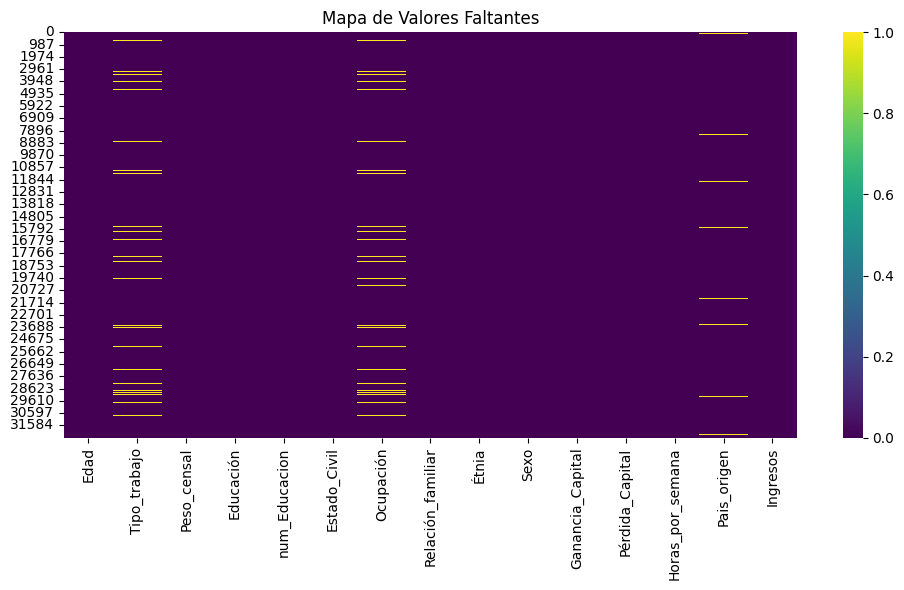

In [97]:
# Convertir faltantes ' ?' a NaN para que info() los muestre
datos_ingresos = datos_ingresos.replace({
    "?": pd.NA,
    " ?": pd.NA,
    "? ": pd.NA,
    "   ?": pd.NA
})
print("\n=== INFORMACIÓN DEL DATASET (CON FALTANTES NA) ===")
datos_ingresos.info()

print("\n=== VALORES FALTANTES (NaN) EN CADA COLUMNA ===")
print(datos_ingresos.isna().sum())

print("\n=== PORCENTAJE DE FALTANTES ===")
porcentaje = (datos_ingresos.isna().mean() * 100).round(2)
print(porcentaje)


# Visualización de valores faltantes
plt.figure(figsize=(10, 6))
sns.heatmap(datos_ingresos.isna(), cbar=True, cmap='viridis')
plt.title('Mapa de Valores Faltantes')
plt.tight_layout()
plt.show()


Tres columnas mostraron datos incompletos, las cuales son: WORKCLASS, OCCUPATION y NATIVE_COUNTRY. Todas de tipo categórico. La primera con un porcentaje de 5.64%, la segunda de 5.66% y la tercera de 1.79%.
No se observan patrones definidos en el mapa de calor de valores faltantes, lo que indica que los valores ausentes están distribuidos de forma aleatoria (MCAR) y no dependen de otras variables.

In [98]:
print("=== OCUPACIÓN ===")
print(datos_ingresos['Ocupación'].value_counts())

print("\n=== TIPO DE TRABAJOS ===")
print(datos_ingresos['Tipo_trabajo'].value_counts())

print("\n=== PAIS DE ORIGEN ===")
print(datos_ingresos['Pais_origen'].value_counts())

=== OCUPACIÓN ===
Ocupación
Profesional especializado         4140
Reparación artesanal              4099
Ejecutivo/Directivo               4066
Administrativo/Clerical           3770
Ventas                            3650
Otros servicios                   3295
Operador/Inspector de máquinas    2002
Transporte y movimiento           1597
Manipuladores/Limpiadores         1370
Agricultura y pesca                994
Soporte técnico                    928
Servicio de protección             649
Servicio doméstico privado         149
Fuerzas armadas                      9
Name: count, dtype: int64

=== TIPO DE TRABAJOS ===
Tipo_trabajo
Sector privado                   22696
Autoempleado (no incorporado)     2541
Gobierno local                    2093
Gobierno estatal                  1298
Autoempleado (incorporado)        1116
Gobierno federal                   960
Sin pago                            14
Nunca ha trabajado                   7
Name: count, dtype: int64

=== PAIS DE ORIGEN ===

Limpiar datos

In [99]:
# 1. Quitar espacios en columnas categóricas
for col in datos_ingresos.select_dtypes(include='object'): # Recorre solo columnas de tipo texto
    datos_ingresos[col] = datos_ingresos[col].str.strip() # Elimina espacios al inicio y final

# 2. Eliminar filas que aún contienen valores faltantes
datos_ingresos = datos_ingresos.dropna()  # Quita cualquier fila que todavía tenga NaN

print("\nDimensiones finales del dataset limpio:", datos_ingresos.shape)
print("Limpieza completada correctamente.")

# 5. VERIFICACIÓN DE LIMPIEZA

print("\n=== VERIFICACIÓN DE VALORES FALTANTES ===")
print(datos_ingresos.isna().sum())

print("\n=== VERIFICACIÓN DE CATEGORÍAS (MUESTRA) ===")
print("\nOcupación:")
print(datos_ingresos['Ocupación'].value_counts().head())

print("\nTipo:trabajo:")
print(datos_ingresos['Tipo_trabajo'].value_counts().head())

print("\nPais_origen:")
print(datos_ingresos['Pais_origen'].value_counts().head())









Dimensiones finales del dataset limpio: (30162, 15)
Limpieza completada correctamente.

=== VERIFICACIÓN DE VALORES FALTANTES ===
Edad                 0
Tipo_trabajo         0
Peso_censal          0
Educación            0
num_Educacion        0
Estado_Civil         0
Ocupación            0
Relación_familiar    0
Étnia                0
Sexo                 0
Ganancia_Capital     0
Pérdida_Capital      0
Horas_por_semana     0
Pais_origen          0
Ingresos             0
dtype: int64

=== VERIFICACIÓN DE CATEGORÍAS (MUESTRA) ===

Ocupación:
Ocupación
Profesional especializado    4038
Reparación artesanal         4030
Ejecutivo/Directivo          3992
Administrativo/Clerical      3721
Ventas                       3584
Name: count, dtype: int64

Tipo:trabajo:
Tipo_trabajo
Sector privado                   22286
Autoempleado (no incorporado)     2499
Gobierno local                    2067
Gobierno estatal                  1279
Autoempleado (incorporado)        1074
Name: count, dtype: int6

Durante el proceso de limpieza del dataset se realizaron varias transformaciones con el propósito de estandarizar los valores y garantizar la coherencia de las variables antes de iniciar el análisis exploratorio. En primer lugar, se eliminaron los espacios en blanco al inicio y al final de todas las columnas categóricas, ya que estos pueden generar categorías duplicadas o afectar los conteos. Asimismo, se eliminaron las filas que aún presentaban valores faltantes para trabajar únicamente con datos completos.

Finalmente, se verificó la ausencia de valores faltantes y se inspeccionaron algunas de las categorías principales (ocupación, tipo de trabajo, país de origen) para confirmar que la limpieza se hubiera aplicado correctamente. Con estas transformaciones, el dataset quedó preparado para avanzar al análisis exploratorio (EDA) y a la generación de visualizaciones.

+Obtener porcentaje de cada clase


Distribución de ingresos (%):
Ingresos
<=50K    75.107751
>50K     24.892249
Name: proportion, dtype: float64


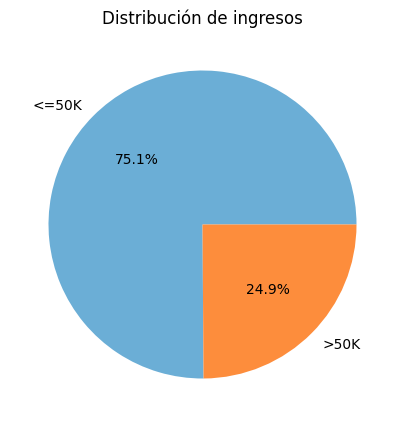

In [100]:
# DISTRIBUCIÓN DE CLASES (INGRESOS)
# Calcula el porcentaje de cada categoría en la variable INCOME (<=50K y >50K)
porcentajes = datos_ingresos['Ingresos'].value_counts(normalize=True) * 100
print("\nDistribución de ingresos (%):")
print(porcentajes)


# Gráfica de INGRESOS
plt.figure(figsize=(5,5))
porcentajes.plot(kind='pie', autopct='%1.1f%%', labels=['<=50K', '>50K'], colors=['#6baed6', '#fd8d3c'])
plt.title('Distribución de ingresos')
plt.ylabel('')
plt.show()


Realizar Gráficas para analizar las tendencias

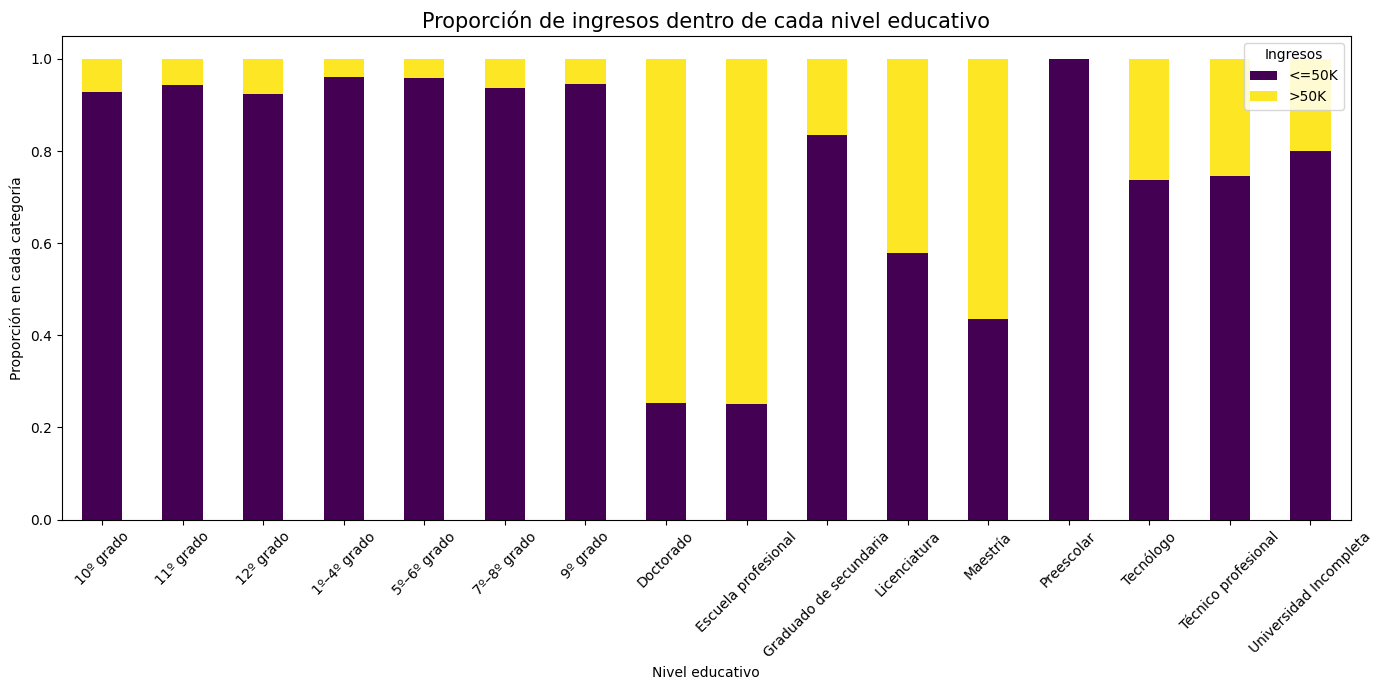

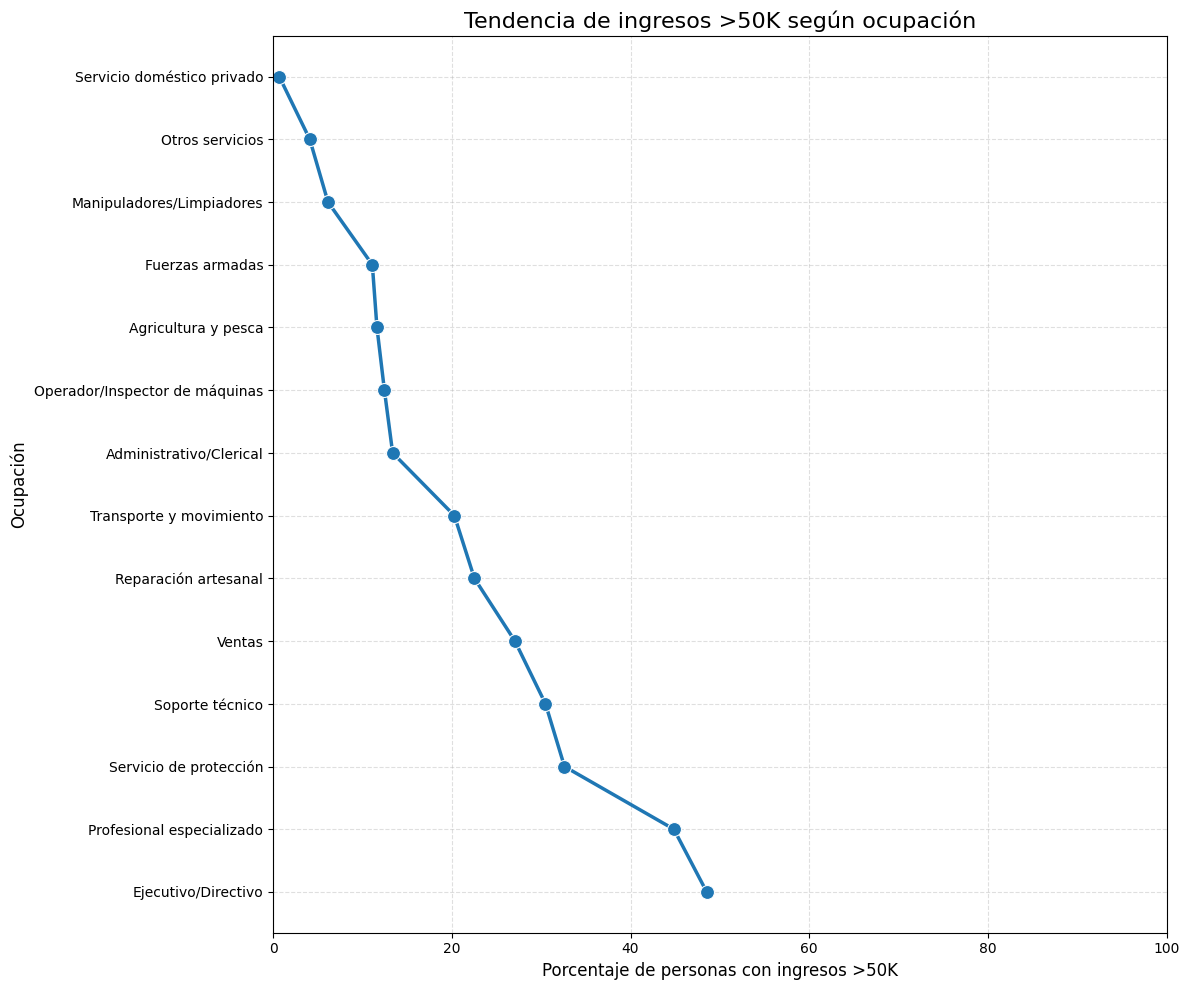

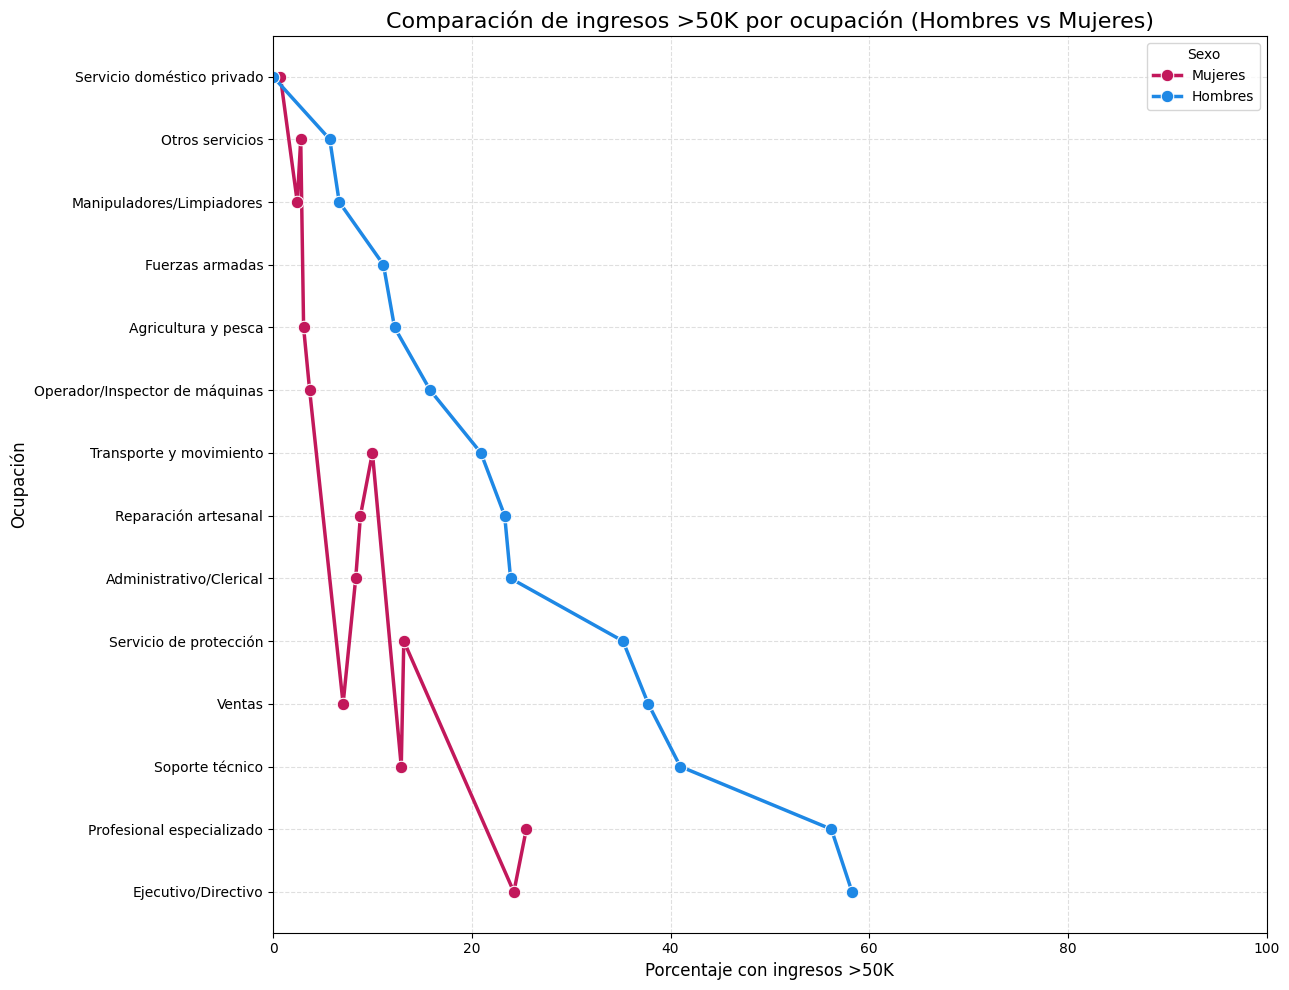

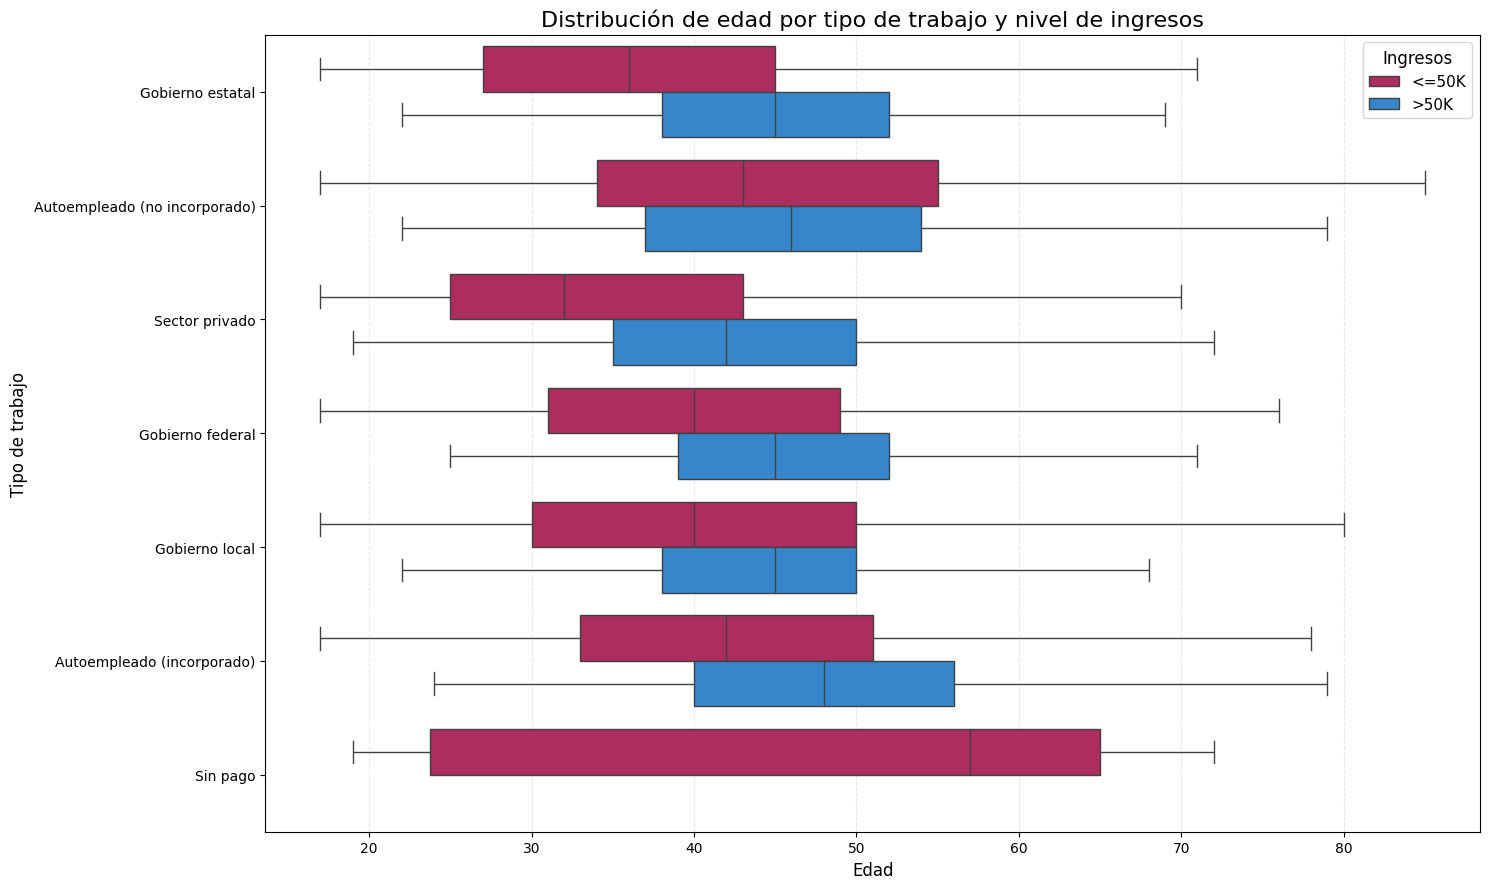

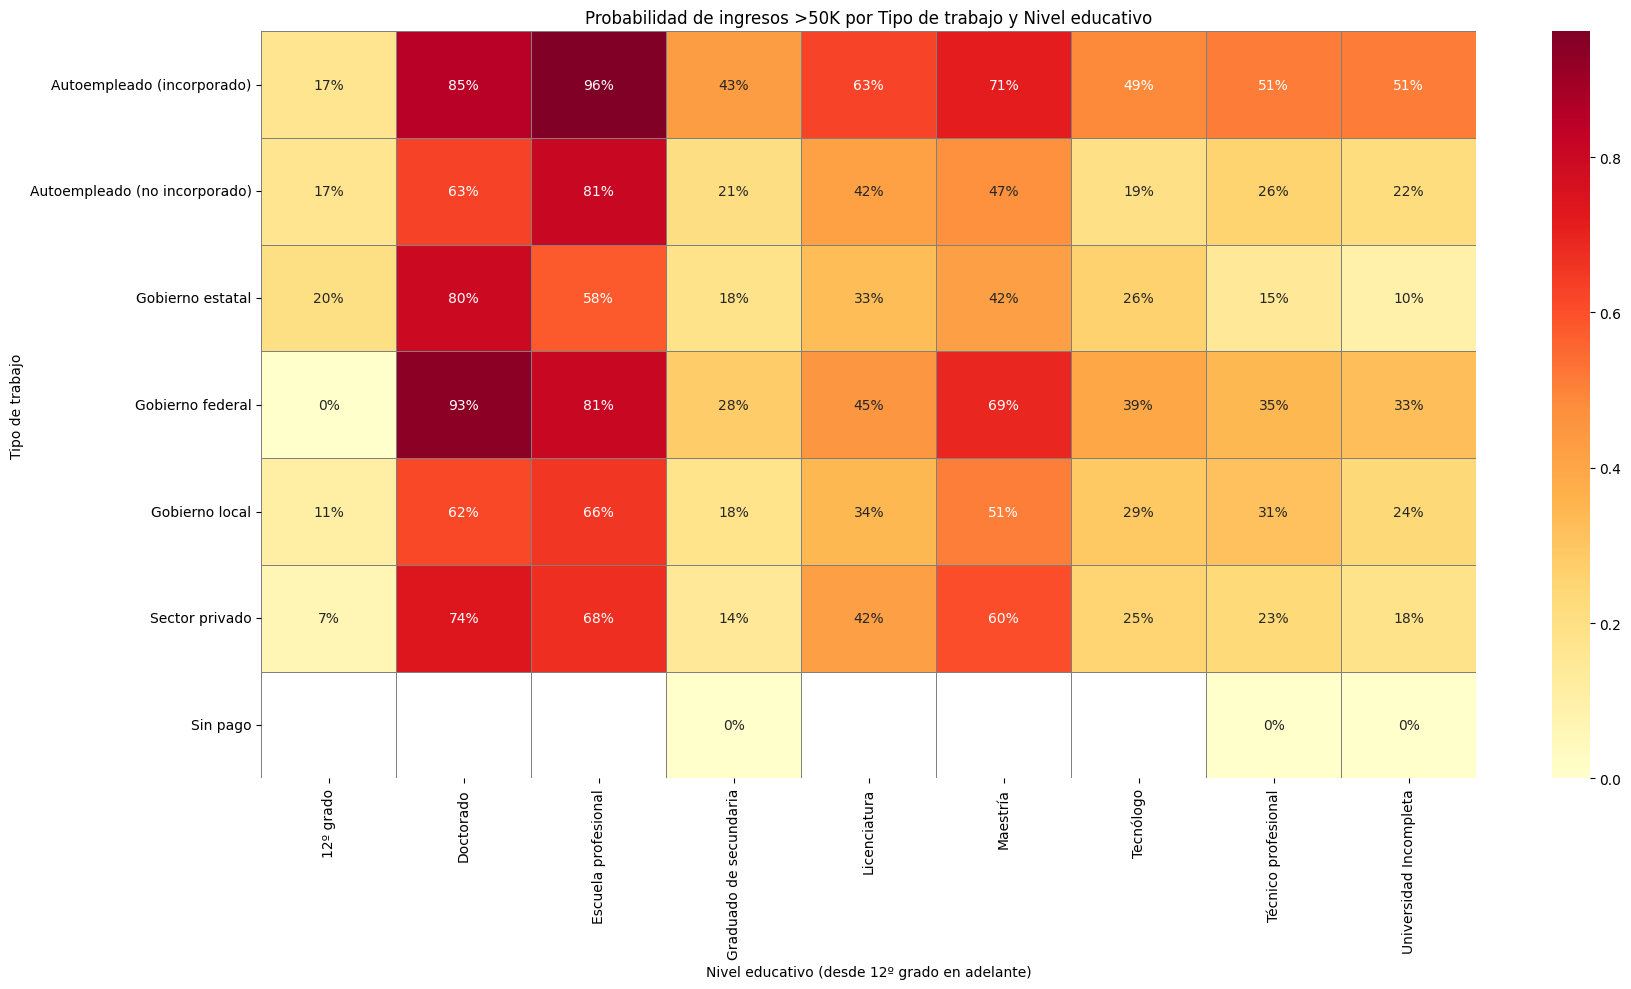

<Figure size 1400x800 with 0 Axes>

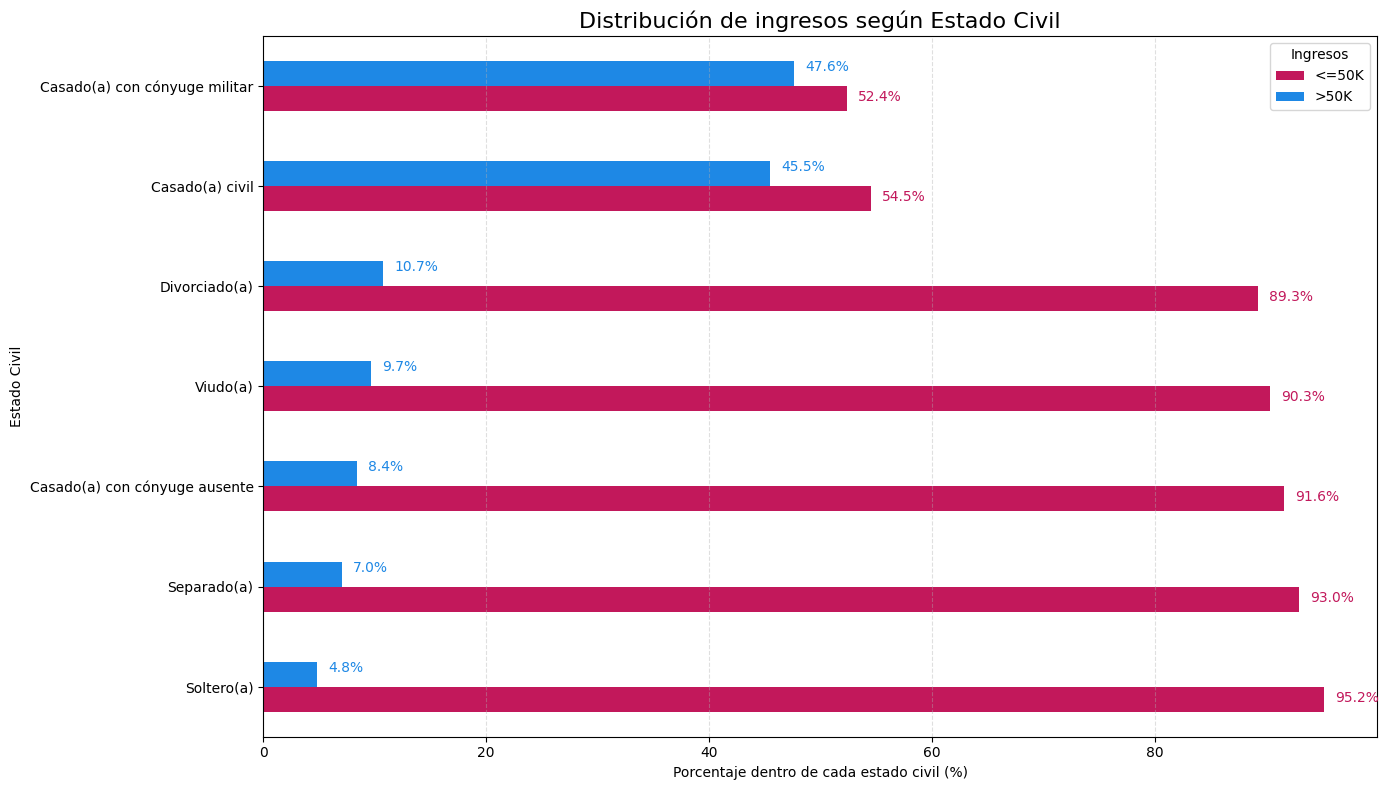

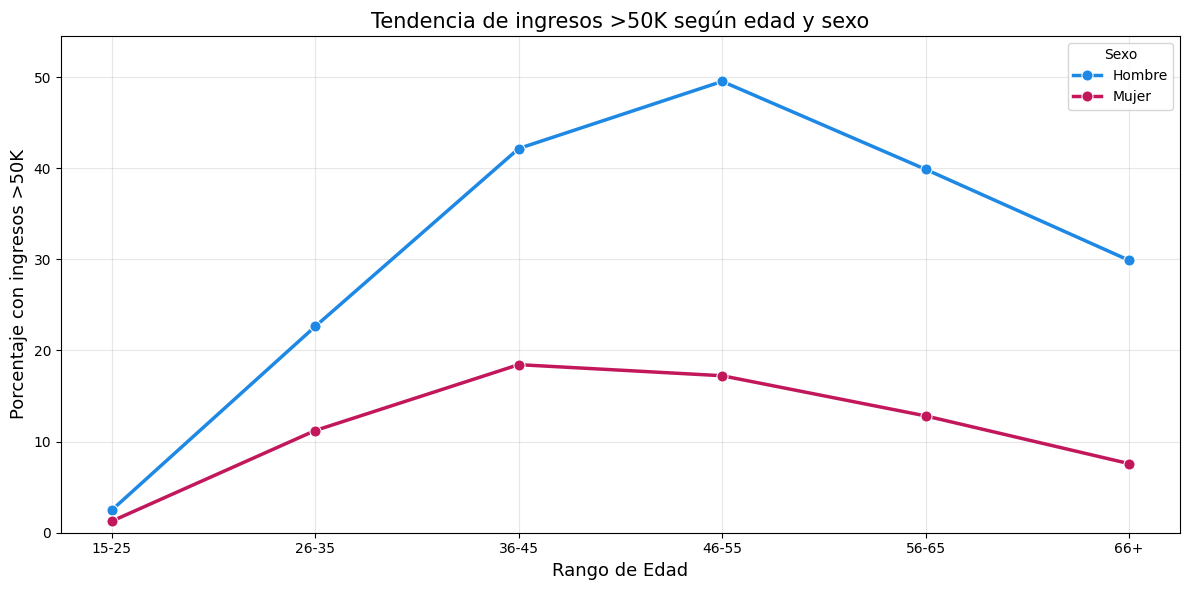

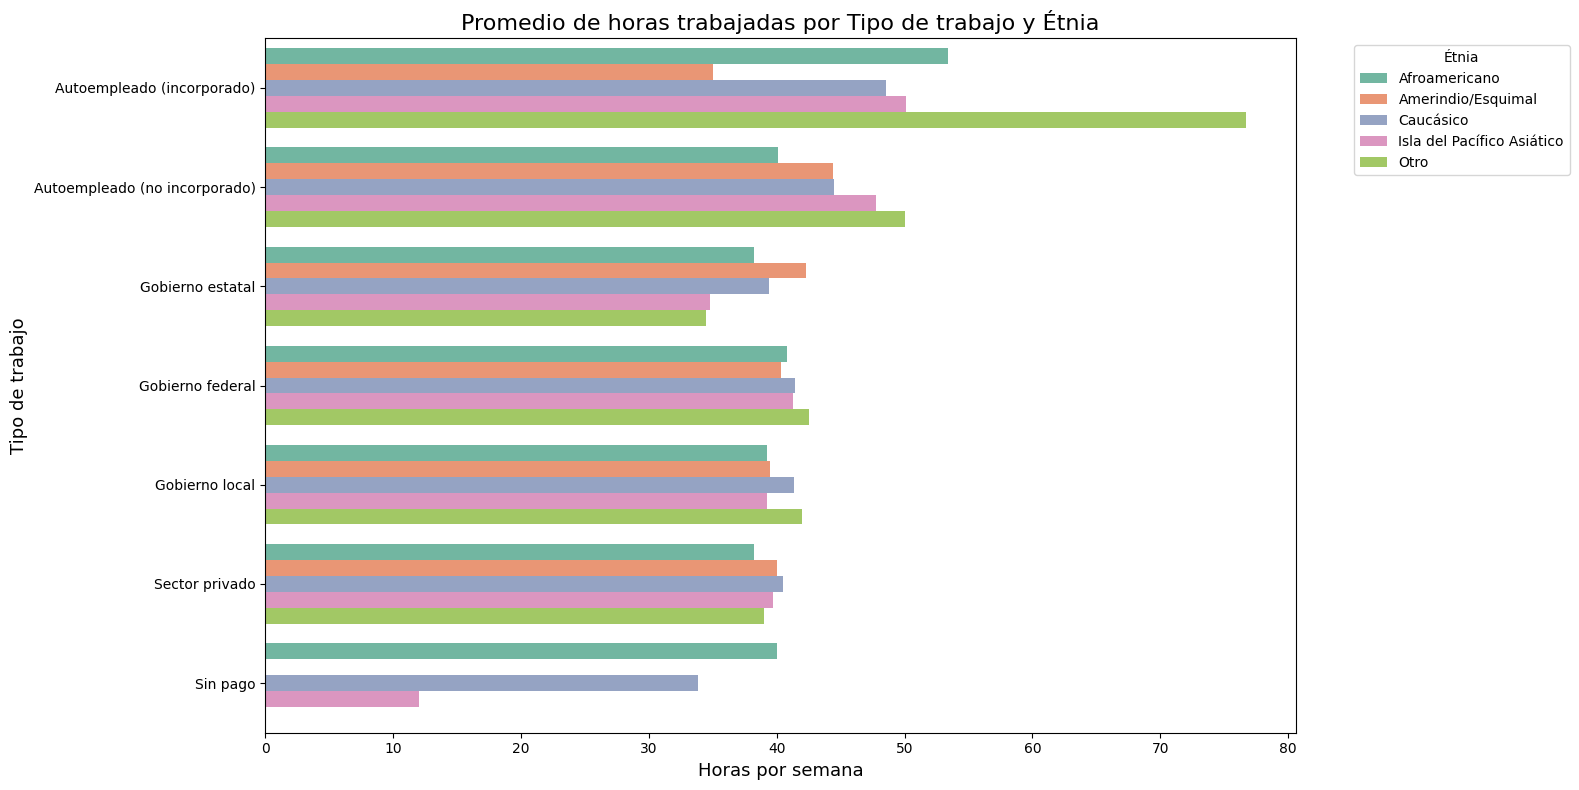

In [101]:
#Gráfica 1. Ingresos por Nivel Educativo
tabla = pd.crosstab(datos_ingresos["Educación"], datos_ingresos["Ingresos"], normalize='index')
# Crea tabla cruzada: % de ingresos dentro de cada nivel educativo.

tabla.plot(kind='bar', figsize=(14,7), stacked=True, cmap='viridis')
# Grafica barras apiladas para ver proporciones por educación.

plt.title("Proporción de ingresos dentro de cada nivel educativo", fontsize=15)
plt.xlabel("Nivel educativo")
plt.ylabel("Proporción en cada categoría")
plt.legend(title="Ingresos", loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
# Ajusta diseño y muestra la gráfica.

#Gráfica 2. Tendencia de Ingresos Altos según Ocupación

#Calcula % de ingresos por ocupación (primera tabla, luego reemplazada).
tabla = (datos_ingresos
         .groupby(["Ocupación", "Ingresos"])
         .size()
         .groupby(level=0)
         .apply(lambda x: x / x.sum())
         .unstack())

# Calcular porcentaje de personas que ganan  >50K por ocupación
tabla = (datos_ingresos
         .groupby("Ocupación")["Ingresos"]
         .apply(lambda x: (x == ">50K").mean() * 100)
         .sort_values())


# Grafica una línea de tendencia por ocupación.
plt.figure(figsize=(12,10))
sns.lineplot(
    x=tabla.values,
    y=tabla.index,
    marker="o",
    linewidth=2.5,
    markersize=10,
    color="#1f77b4"
)

# Ajustes finales para una lectura clara.
plt.title("Tendencia de ingresos >50K según ocupación", fontsize=16)
plt.xlabel("Porcentaje de personas con ingresos >50K", fontsize=12)
plt.ylabel("Ocupación", fontsize=12)
plt.xlim(0, 100)  # escala de 0% a 100%
plt.grid(axis="both", linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()


#Gráfica 3. Comparación Ingresos por Ocupación (Hombres vs Mujeres)

# # Separa el dataset en dos grupos para calcular porcentajes independientes por sexo.
mujeres = datos_ingresos[datos_ingresos["Sexo"] == "Mujer"]
hombres = datos_ingresos[datos_ingresos["Sexo"] == "Hombre"]

# Calcula por cada ocupación qué porcentaje gana >50K.
tabla_mujeres = (
    mujeres.groupby("Ocupación")["Ingresos"]
    .apply(lambda x: (x == ">50K").mean() * 100)
)

tabla_hombres = (
    hombres.groupby("Ocupación")["Ingresos"]
    .apply(lambda x: (x == ">50K").mean() * 100)
)

# Unir sin rellenar vacíos
tabla_combinada = pd.concat([tabla_mujeres, tabla_hombres], axis=1)
tabla_combinada.columns = ["Mujeres", "Hombres"]

# Ordenar por hombres (tienen todas las ocupaciones)
tabla_combinada = tabla_combinada.sort_values("Hombres")

plt.figure(figsize=(13, 10))

# LÍNEA DE MUJEREs
sns.lineplot(
    x=tabla_combinada["Mujeres"],
    y=tabla_combinada.index,
    marker="o",
    linewidth=2.5,
    markersize=9,
    color="#C2185B",
    label="Mujeres"
)

# LÍNEA DE HOMBRES
sns.lineplot(
    x=tabla_combinada["Hombres"],
    y=tabla_combinada.index,
    marker="o",
    linewidth=2.5,
    markersize=9,
    color="#1E88E5",
    label="Hombres"
)

# Ajustes finales y visualización.
plt.title("Comparación de ingresos >50K por ocupación (Hombres vs Mujeres)", fontsize=16)
plt.xlabel("Porcentaje con ingresos >50K", fontsize=12)
plt.ylabel("Ocupación", fontsize=12)
plt.xlim(0, 100)
plt.grid(axis="both", linestyle="--", alpha=0.4)
plt.legend(title="Sexo")
plt.tight_layout()
plt.show()


#Gráfica 4. Distribución de Edad por Tipo de Trabajo e Ingresos
plt.figure(figsize=(15, 9))
# Boxplot que muestra edades por tipo de trabajo y nivel de ingresos.
sns.boxplot(
    data=datos_ingresos,
    x="Edad",
    y="Tipo_trabajo",
    hue="Ingresos",
    palette={"<=50K": "#C2185B", ">50K": "#1E88E5"},
    showfliers=False  # Opcional: oculta outliers para una vista más limpia
)

plt.title("Distribución de edad por tipo de trabajo y nivel de ingresos", fontsize=16)
plt.xlabel("Edad", fontsize=12)
plt.ylabel("Tipo de trabajo", fontsize=12)

plt.legend(title="Ingresos", fontsize=11, title_fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.3)
plt.tight_layout()
plt.show()

#Gráfica 5. Heatmap Educación vs Tipo de Trabajo
# Lista de niveles educativos a incluir.
niveles_altos = [
    "12º grado",
    "Graduado de secundaria",
    "Universidad Incompleta",
    "Técnico profesional",
    "Tecnólogo",
    "Escuela profesional",
    "Licenciatura",
    "Maestría",
    "Doctorado"
]

# Filtra los datos solo a los niveles seleccionados.
datos_filtrados = datos_ingresos[ datos_ingresos["Educación"].isin(niveles_altos) ]

pivot = datos_filtrados.pivot_table(
    index="Tipo_trabajo",
    columns="Educación",
    values="Ingresos",
    aggfunc=lambda x: (x == ">50K").mean()
)
plt.figure(figsize=(18,10))
sns.heatmap(
    pivot,
    cmap="YlOrRd",
    annot=True,
    fmt=".0%",
    linewidths=0.5,
    linecolor="gray"
)

plt.title("Probabilidad de ingresos >50K por Tipo de trabajo y Nivel educativo")
plt.xlabel("Nivel educativo (desde 12º grado en adelante)")
plt.ylabel("Tipo de trabajo")
plt.tight_layout()
plt.show()

#Gráfica 6. Distribución de Ingresos según Estado Civil

# Tabla de proporciones
tabla_ec = pd.crosstab(
    index=datos_ingresos["Estado_Civil"],
    columns=datos_ingresos["Ingresos"],
    normalize="index"
) * 100 # Calcula el porcentaje de personas de cada estado civil en cada categoría de ingreso.

# Para asegurar el orden correcto de columnas
tabla_ec = tabla_ec[["<=50K", ">50K"]]

# Ordenar por mayor proporción de >50K
tabla_ec = tabla_ec.sort_values(by=">50K", ascending=True)

plt.figure(figsize=(14, 8))
# Gráfica de barras horizontales para facilitar lectura comparativa.
tabla_ec.plot(
    kind="barh",
    color={"<=50K": "#C2185B", ">50K": "#1E88E5"},
    figsize=(14, 8)
)

plt.title("Distribución de ingresos según Estado Civil", fontsize=16)
plt.xlabel("Porcentaje dentro de cada estado civil (%)")
plt.ylabel("Estado Civil")
plt.legend(title="Ingresos")
plt.grid(axis="x", linestyle="--", alpha=0.4)

# Etiquetas con porcentajes
for i, (low, high) in enumerate(zip(tabla_ec["<=50K"], tabla_ec[">50K"])):
    plt.text(low + 1, i - 0.15, f"{low:.1f}%", color="#C2185B", fontsize=10)
    plt.text(high + 1, i + 0.15, f"{high:.1f}%", color="#1E88E5", fontsize=10)
plt.tight_layout()
plt.show()

#Gráfica 7. Tendencia de Ingresos Altos según Edad y Sexo
# CREAR RANGO DE EDAD SOLO PARA LA GRÁFICA

bins = [15, 25, 35, 45, 55, 65, 90]
labels = ["15-25", "26-35", "36-45", "46-55", "56-65", "66+"]

# Crear columna temporal
datos_ingresos["Rango_Edad"] = pd.cut(datos_ingresos["Edad"], bins=bins, labels=labels)

# CALCULAR PORCENTAJE

tabla = datos_ingresos.groupby(["Rango_Edad", "Sexo"])["Ingresos"] \
    .apply(lambda x: (x == ">50K").mean() * 100) \
    .reset_index()

plt.figure(figsize=(12,6))

sns.lineplot(
    data=tabla,
    x="Rango_Edad",
    y="Ingresos",
    hue="Sexo",
    marker="o",
    linewidth=2.5,
    markersize=8,
    palette={"Hombre": "#1E88E5", "Mujer": "#C2185B"}
)

plt.title("Tendencia de ingresos >50K según edad y sexo", fontsize=15)
plt.xlabel("Rango de Edad", fontsize=13)
plt.ylabel("Porcentaje con ingresos >50K", fontsize=13)
plt.grid(alpha=0.3)
plt.ylim(0, tabla["Ingresos"].max() + 5)

plt.tight_layout()
plt.show()

#Gráfica 8. Horas Trabajadas por Tipo de Trabajo y Étnia
# Calcular el promedio de horas por semana por Tipo de trabajo y Étnia
tabla = datos_ingresos.groupby(["Tipo_trabajo", "Étnia"])["Horas_por_semana"].mean().reset_index()

plt.figure(figsize=(16, 8))

sns.barplot(
    data=tabla,
    x="Horas_por_semana",
    y="Tipo_trabajo",
    hue="Étnia",
    palette="Set2"
)

plt.title("Promedio de horas trabajadas por Tipo de trabajo y Étnia", fontsize=16)
plt.xlabel("Horas por semana", fontsize=13)
plt.ylabel("Tipo de trabajo", fontsize=13)
plt.legend(title="Étnia", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.tight_layout()
plt.show()


Gráfica 1 – Proporción de ingresos dentro de cada nivel educativo

Esta gráfica muestra cómo se distribuyen los ingresos según el nivel educativo alcanzado.
La mayoría de niveles educativos presentan una proporción muy alta de ingresos ≤50K, especialmente en educación básica y media.
A medida que aumenta el nivel educativo (Licenciatura, Maestría, Doctorado), crece notablemente la proporción de personas que ganan >50K, reflejando que la educación superior está asociada a mejores oportunidades salariales.
Doctorado y Escuela Profesional son los niveles con mayor presencia de altos ingresos.


---


Gráfica 2 – Tendencia de ingresos >50K según ocupación

La gráfica ordena las ocupaciones desde la menor hasta la mayor probabilidad de ganar más de 50K.
Se observa una clara segmentación: ocupaciones de servicios, trabajo manual y trabajos de limpieza presentan porcentajes muy bajos de ingresos altos.
Por el contrario, ocupaciones como Ejecutivo/Directivo y Profesional especializado tienen porcentajes mucho mayores, lo que confirma la brecha salarial entre trabajos operativos y trabajos altamente calificados.
La tendencia muestra un salto fuerte entre los trabajos manuales y los profesionales.


---


Gráfica 3 – Comparación de ingresos >50K por ocupación (Hombres vs Mujeres)

Esta gráfica profundiza la desigualdad observada anteriormente, pero separando por género.
En prácticamente todas las ocupaciones, los hombres tienen una probabilidad mayor de ganar más de 50K que las mujeres.
En algunas tareas, como profesional especializado, la diferencia es muy marcada.
Además, se evidencia que en muchas ocupaciones de servicios, las mujeres prácticamente no alcanzan ingresos altos, mostrando una clara brecha salarial y segregación ocupacional.
El contraste es notable en trabajos como transporte, ventas y sector técnico.


---


Gráfica 4 – Distribución de edad por tipo de trabajo e ingresos

Los boxplots muestran las edades típicas para cada tipo de trabajo, diferenciando a quienes ganan más o menos de 50K.
En todos los tipos de empleo, los ingresos altos se concentran en personas con más edad (mayor experiencia).
Los trabajos sin pago o no incorporados presentan edades más variables, mientras que empleos gubernamentales y sector privado muestran rangos más estructurados.
Queda claro que la edad (experiencia laboral) influye directamente en la probabilidad de ingresos altos en prácticamente todos los sectores.


---


Gráfica 5 – Probabilidad de ingresos >50K por Tipo de trabajo y Nivel educativo (Heatmap)

El heatmap permite identificar combinaciones fuertes entre educación y tipo de empleo.
Los colores intensos muestran que los mayores porcentajes de altos ingresos ocurren en:

Autoempleado incorporado

Gobierno federal

Profesiones especializadas
…cuando se combinan con niveles educativos como Doctorado, Escuela Profesional o Maestría.

Por el contrario, niveles educativos bajos o trabajos sin pago prácticamente no presentan ingresos altos.
Se observa que la interacción educación + tipo de trabajo es determinante, no solo el nivel educativo por sí solo.


---


Gráfica 6 – Distribución de ingresos según Estado Civil

Los porcentajes muestran una relación clara entre estado civil y salario.
Las personas casadas (especialmente con cónyuge civil o militar) tienen proporciones más altas de ingresos >50K.
Estados como soltero(a), separado(a), viudo(a) o cónyuge ausente presentan porcentajes muy bajos de ingresos altos.
Esto puede relacionarse con mayor estabilidad laboral, roles familiares o antigüedad en el mercado laboral.
La diferencia más notable es entre “casado(a)” y “soltero(a)”.


---


Gráfica 7 – Tendencia de ingresos >50K según edad y sexo

La tendencia es muy clara:

Ambos sexos aumentan su probabilidad de ingresos altos hasta aproximadamente los 46–55 años, cuando alcanzan su pico.

Luego disminuye, probablemente por transición a empleos menos demandantes o cercanía al retiro.

Los hombres duplican o triplican la probabilidad de ingresos altos frente a las mujeres en todos los rangos de edad.

Esta gráfica refleja que la edad influye, pero la brecha por sexo se mantiene constante e incluso se amplía en edades laborales altas.


---


Gráfica 8 – Promedio de horas trabajadas por Tipo de trabajo y Étnia

Aquí se observa que el promedio de horas por semana varía tanto por tipo de empleo como por grupo étnico.
Los autoempleados (incorporados o no) tienden a trabajar más horas que los empleados del gobierno o sector privado.
En algunos tipos de trabajo, ciertos grupos étnicos trabajan más horas, lo que podría indicar desigualdades en carga laboral.
También se identifica que “Sin pago” tiene el promedio más bajo, lo cual es lógico por el tipo de actividad.

La gráfica muestra diferencias, pero sin asociarlas directamente a ingresos (solo a tiempo trabajado).

In [102]:
print(datos_ingresos.groupby(["Ocupación", "Sexo"]).size())

Ocupación                       Sexo  
Administrativo/Clerical         Hombre    1209
                                Mujer     2512
Agricultura y pesca             Hombre     924
                                Mujer       65
Ejecutivo/Directivo             Hombre    2849
                                Mujer     1143
Fuerzas armadas                 Hombre       9
Manipuladores/Limpiadores       Hombre    1186
                                Mujer      164
Operador/Inspector de máquinas  Hombre    1423
                                Mujer      543
Otros servicios                 Hombre    1454
                                Mujer     1758
Profesional especializado       Hombre    2547
                                Mujer     1491
Reparación artesanal            Hombre    3814
                                Mujer      216
Servicio de protección          Hombre     568
                                Mujer       76
Servicio doméstico privado      Hombre       8
                     

In [103]:
# eliminar la columna temporal
datos_ingresos.drop(columns=["Rango_Edad"], inplace=True)

Conversión de variables a número

In [104]:
# 1. Detectar columnas categóricas
categorical_features = datos_ingresos.select_dtypes(include=["object", "category"]).columns.tolist()

print("Columnas categóricas detectadas:")
print(categorical_features)

# 2. EXCLUIR "Ingresos" (para NO convertirla)
if "Ingresos" in categorical_features:
    categorical_features.remove("Ingresos")

print("\nColumnas que se convertirán con One-Hot Encoding:")
print(categorical_features)

# 3. APLICAR ONE-HOT ENCODING sin tocar Ingresos
datos_onehot = pd.get_dummies(
    datos_ingresos,
    columns=categorical_features,
    drop_first=True,   # evita multicolinealidad
    dtype=int          # convierte todo a 0 y 1
)

# 4. Revisar resultado
print("\nDimensiones del dataset después del One-Hot Encoding:", datos_onehot.shape)
print("\nTipos de datos finales:")
print(datos_onehot.dtypes.value_counts())

# 5. Confirmar que Ingresos SIGUE siendo texto
print("\nValores únicos de Ingresos (deben ser <=50K y >50K):")
print(datos_onehot["Ingresos"].unique())


Columnas categóricas detectadas:
['Tipo_trabajo', 'Educación', 'Estado_Civil', 'Ocupación', 'Relación_familiar', 'Étnia', 'Sexo', 'Pais_origen', 'Ingresos']

Columnas que se convertirán con One-Hot Encoding:
['Tipo_trabajo', 'Educación', 'Estado_Civil', 'Ocupación', 'Relación_familiar', 'Étnia', 'Sexo', 'Pais_origen']

Dimensiones del dataset después del One-Hot Encoding: (30162, 97)

Tipos de datos finales:
int64     96
object     1
Name: count, dtype: int64

Valores únicos de Ingresos (deben ser <=50K y >50K):
['<=50K' '>50K']


El dataset Adult Income contiene numerosas variables categóricas (como país de origen, ocupación, educación, estado civil, etc.). La regresión lineal sólo puede trabajar con valores numéricos, por lo que era necesario transformar estas categorías en números.

El método adecuado para este tipo de datos es One-Hot Encoding, ya que convierte cada categoría en una columna binaria (0 o 1) sin imponer relaciones numéricas artificiales entre las clases. Esto permite que el modelo procese correctamente todas las variables categóricas y evita interpretaciones incorrectas que ocurrirían si se asignaran números arbitrarios.

Convertir Ingresos a Binario

In [105]:
# CONVERTIR INGRESOS A BINARIO (solo para modelar)

# Crear copia para modelado
datos_modelo = datos_onehot.copy()

# Convertir ingresos a 0/1
datos_modelo["Ingresos_binario"] = datos_modelo["Ingresos"].apply(lambda x: 1 if x == ">50K" else 0)

# Verificación
print("Valores únicos en Ingresos_binario:")
print(datos_modelo["Ingresos_binario"].unique())

# Ahora se puede eliminar la columna categórica original
datos_modelo = datos_modelo.drop(columns=["Ingresos"])

Valores únicos en Ingresos_binario:
[0 1]


Normalización

In [106]:
# Separar X y y
X = datos_modelo.drop(columns=["Ingresos_binario"])
y = datos_modelo["Ingresos_binario"]

# Normalizar solo X
scaler = MinMaxScaler()
X_normalizado = scaler.fit_transform(X)

#Convertir DataFrame para poder visualizarlo
X_normalizado_df = pd.DataFrame(X_normalizado, columns=X.columns)


# VER NORMALIZACIÓN
print("=== PRIMERAS FILAS NORMALIZADAS ===")
print(X_normalizado_df.head())

print("\n=== ANTES DE NORMALIZAR ===")
print(X.describe())

print("\n=== DESPUÉS DE NORMALIZAR ===")
print(X_normalizado_df.describe())

print("\nValores mínimos por columna (debe ser 0):")
print(X_normalizado_df.min())

print("\nValores máximos por columna (debe ser 1):")
print(X_normalizado_df.max())


=== PRIMERAS FILAS NORMALIZADAS ===
       Edad  Peso_censal  num_Educacion  Ganancia_Capital  Pérdida_Capital  \
0  0.301370     0.043338       0.800000           0.02174              0.0   
1  0.452055     0.047277       0.800000           0.00000              0.0   
2  0.287671     0.137244       0.533333           0.00000              0.0   
3  0.493151     0.150212       0.400000           0.00000              0.0   
4  0.150685     0.220703       0.800000           0.00000              0.0   

   Horas_por_semana  Tipo_trabajo_Autoempleado (no incorporado)  \
0          0.397959                                         0.0   
1          0.122449                                         1.0   
2          0.397959                                         0.0   
3          0.397959                                         0.0   
4          0.397959                                         0.0   

   Tipo_trabajo_Gobierno estatal  Tipo_trabajo_Gobierno federal  \
0                        

La normalización es fundamental porque garantiza que todas las variables numéricas estén en una misma escala.
Sin ella, características con valores grandes (como FNLWGT o CAPITAL_GAIN) dominarían las métricas y afectarían el desempeño del modelo.
Al aplicar MinMaxScaler y StandardScaler, se logró que las variables tuvieran un rango comparable, permitiendo que el modelo aprenda patrones de manera equilibrada y estable.

Correlación

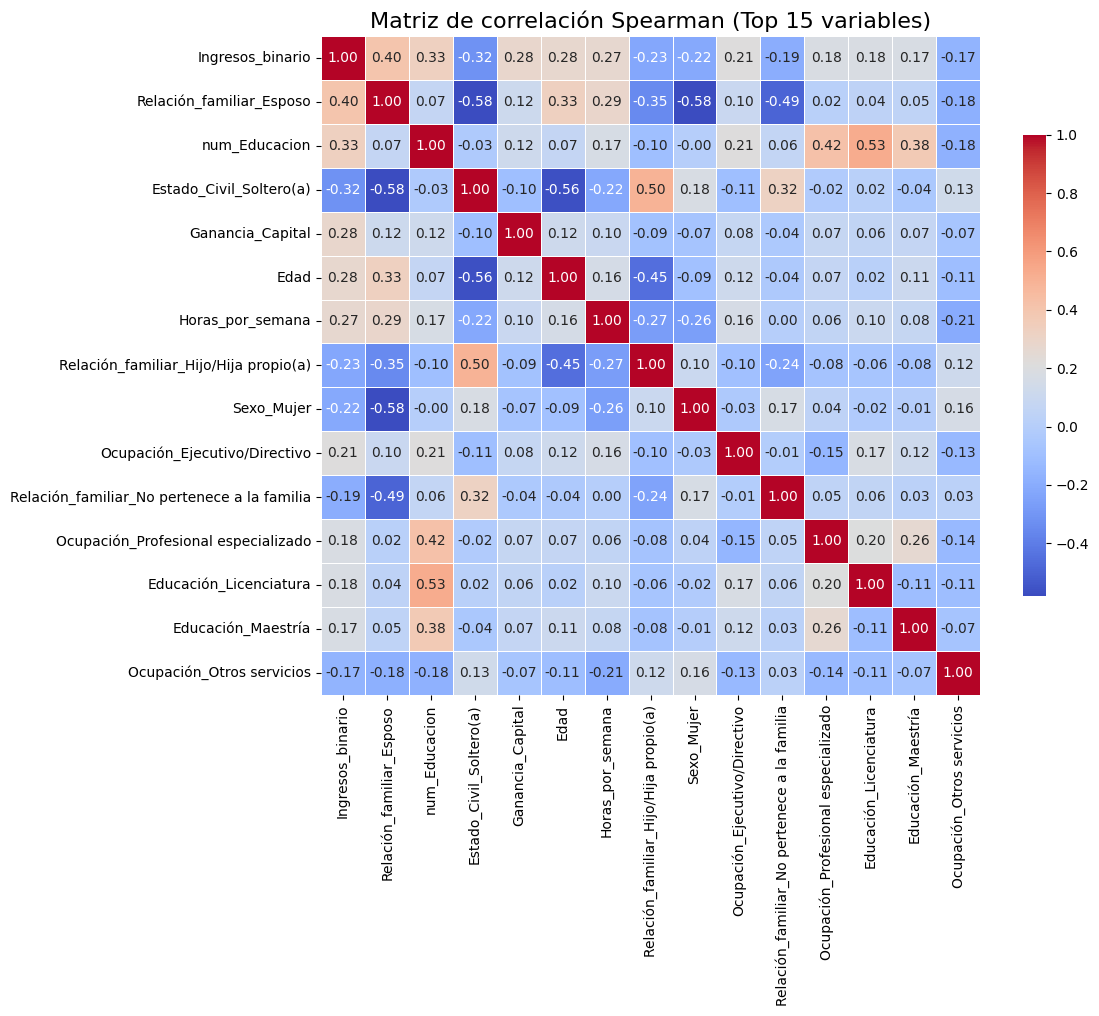

In [107]:
# Calcular correlación Spearman
corr_spearman = datos_modelo.corr(method='spearman') #Es datos_onehot + conversión binaria de ingresos

# 2. Seleccionar top 15 variables más correlacionadas con ingresos
top_vars = (
    corr_spearman["Ingresos_binario"] #Se pueda medir qué tan relacionada está cada variable con el hecho de ganar más de 50K.
    .abs()
    .sort_values(ascending=False)
    .head(15)
    .index
    .tolist()
)

# Asegurar incluir siempre la variable objetivo al centro
if "Ingresos_binario" not in top_vars:
    top_vars.append("Ingresos_binario")

# Crear submatriz reducida
matriz_reducida = corr_spearman.loc[top_vars, top_vars]

# 3. Heatmap profesional
plt.figure(figsize=(12,10))
sns.heatmap(
    matriz_reducida,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    square=True,
    linewidths=0.4,
    cbar_kws={'shrink': 0.7}
)

plt.title("Matriz de correlación Spearman (Top 15 variables)", fontsize=16)
plt.tight_layout()
plt.show()


La matriz Spearman muestra qué variables están más relacionadas con ganar más de 50K. Las correlaciones son moderadas, lo cual es normal en datos sociales, pero permiten identificar patrones claros. Las relaciones más fuertes indican que tener el rol de “esposo”, tener mayor nivel educativo, ser mayor de edad, trabajar más horas y recibir ganancias de capital aumenta la probabilidad de tener ingresos altos. En cambio, ser soltero y ser mujer están asociados negativamente con los ingresos, reflejando diferencias económicas y laborales presentes en el dataset. En general, la educación, el estado civil, la ocupación, la edad y el género son los factores que más influyen en las diferencias salariales observadas.

Test de normalidad

In [108]:
def test_normalidad(dataframe, alpha=0.05):
    print("=== TEST DE SHAPIRO-WILK ===")
    print(f"Nivel de significancia usado: {alpha}\n")

    # Recorrer solo columnas numéricas
    numeric_cols = dataframe.select_dtypes(include=["int64", "float64"]).columns

    for col in numeric_cols:
        data = dataframe[col].dropna()

        if len(data) >= 3:
            # Shapiro solo acepta hasta 5000 datos
            sample_size = min(5000, len(data))
            sample = data.sample(sample_size, random_state=42)

            stat, p_value = shapiro(sample)
            resultado = "NORMAL" if p_value > alpha else "NO NORMAL"

            print(f"{col}: W={stat:.4f}, p={p_value:.4f} → {resultado}")

# Ejecutar test
test_normalidad(datos_ingresos)

=== TEST DE SHAPIRO-WILK ===
Nivel de significancia usado: 0.05

Edad: W=0.9728, p=0.0000 → NO NORMAL
Peso_censal: W=0.9219, p=0.0000 → NO NORMAL
num_Educacion: W=0.9214, p=0.0000 → NO NORMAL
Ganancia_Capital: W=0.1176, p=0.0000 → NO NORMAL
Pérdida_Capital: W=0.2199, p=0.0000 → NO NORMAL
Horas_por_semana: W=0.8908, p=0.0000 → NO NORMAL


El test de Shapiro–Wilk mostró que todas las variables numéricas del dataset presentan valores de p menores a 0.05, por lo que se rechaza la hipótesis de normalidad en todos los casos. Esto indica que las distribuciones de edad, horas trabajadas, educación, ingresos de capital y otros atributos no siguen una distribución normal, debido a su fuerte asimetría y presencia de valores extremos, lo cual es característico de datos socioeconómicos reales.

**PREGUNTA DE INVESTIGACIÓN**


---


¿Cómo influyen la edad, el nivel educativo y el sexo biológico en la probabilidad de que una persona alcance ingresos superiores a 50 000 USD al año?


---



Ejercicio de predicción

Dimensiones de X: (30162, 96)
Dimensiones de y: (30162,)

=========== EVALUACIÓN DEL MODELO ===========
Error Cuadrático Medio (MSE): 0.1182
Raíz del Error Cuadrático Medio (RMSE): 0.3438
Coeficiente R²: 0.3757
Interpretación R²: El modelo explica el 37.57% de la variabilidad.

=========== IMPORTANCIA DE VARIABLES ===========
                                       Variable  Coeficiente
48  Relación_familiar_No pertenece a la familia    -0.285935
50            Relación_familiar_Soltero/Soltera    -0.270673
47        Relación_familiar_Hijo/Hija propio(a)    -0.258765
49              Relación_familiar_Otro familiar    -0.255874
92            Pais_origen_Territorios de EE.UU.    -0.206144
11                        Tipo_trabajo_Sin pago    -0.200191
83                     Pais_origen_Países Bajos    -0.178998
89                        Pais_origen_Sudáfrica    -0.161052
95                       Pais_origen_Yugoslavia     0.139145
59                         Pais_origen_Colombia    -0.138957
8

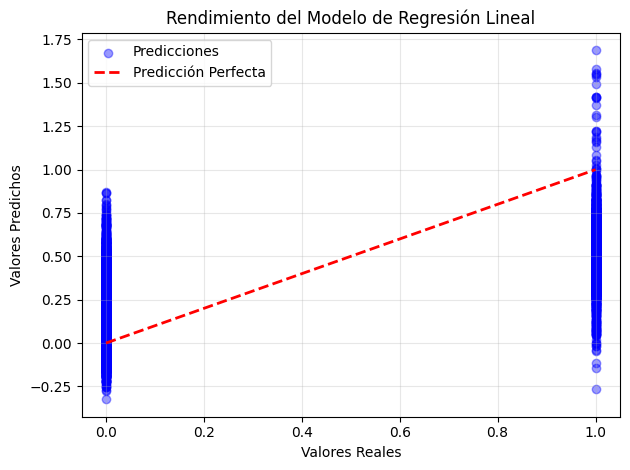

In [109]:
# 1. Definir X y y

# X = todas las columnas excepto la variable objetivo
X = datos_modelo.drop(columns=["Ingresos_binario"])

# y = variable objetivo binaria (0 = <=50K , 1 = >50K)
y = datos_modelo["Ingresos_binario"]

print("Dimensiones de X:", X.shape)
print("Dimensiones de y:", y.shape)

# 2. Dividir el dataset (80% entrenamiento – 20% prueba)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

# 3. Crear y entrenar el modelo

modelo = LinearRegression()
modelo.fit(X_train, y_train)

# 4. Realizar predicciones
y_pred = modelo.predict(X_test)

# 5. Evaluación del modelo

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\n=========== EVALUACIÓN DEL MODELO ===========")
print(f"Error Cuadrático Medio (MSE): {mse:.4f}")
print(f"Raíz del Error Cuadrático Medio (RMSE): {rmse:.4f}")
print(f"Coeficiente R²: {r2:.4f}")
print(f"Interpretación R²: El modelo explica el {r2 * 100:.2f}% de la variabilidad.\n")


# 6. Importancia de las variables (coeficientes)


coeficientes = pd.DataFrame({
    "Variable": X.columns,
    "Coeficiente": modelo.coef_
}).sort_values("Coeficiente", key=lambda x: x.abs(), ascending=False)

print("=========== IMPORTANCIA DE VARIABLES ===========")
print(coeficientes.head(20))  # Mostrar las 20 más importantes

# 7. Visualización: valores reales vs predichos

plt.scatter(y_test, y_pred, alpha=0.4, color='blue', label='Predicciones')
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--', linewidth=2, label='Predicción Perfecta')

plt.xlabel("Valores Reales")
plt.ylabel("Valores Predichos")
plt.title("Rendimiento del Modelo de Regresión Lineal")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()



¿Qué muestra la gráfica?

Que el modelo:

distingue un poco entre clase 0 y 1

pero no de forma clara

y las predicciones están muy dispersas

lo cual coincide con un R² bajo.

El modelo de regresión lineal obtuvo un MSE de 0.1182, un RMSE de 0.3438 y un R² de 0.3757, lo que evidencia un desempeño moderado a bajo, ya que solo explica el 37.57 % de la variabilidad de la variable objetivo. La gráfica de valores reales frente a los predichos muestra una dispersión amplia, debido a que la variable objetivo es binaria y la regresión lineal produce valores continuos. Por ello, el modelo no es suficientemente preciso para predecir si una persona supera los 50 000 USD al año, aunque sí permite identificar tendencias generales.

Respecto a la importancia de las variables, los coeficientes señalan que factores como el estado civil, la relación familiar, el tipo de empleo, la ocupación y el país de origen influyen notablemente en la predicción. Asimismo, las variables de interés para la investigación también muestran patrones claros: la edad tiene una asociación positiva moderada con ingresos altos, un mayor nivel educativo incrementa la probabilidad estimada de obtener ingresos elevados y el sexo biológico evidencia diferencias que reflejan desigualdades salariales presentes en el dataset.

En conjunto, el modelo sí responde la pregunta de investigación, aunque solo de manera parcial. Muestra que la edad, la educación y el sexo influyen en los ingresos, pero su bajo desempeño limita la solidez de las conclusiones, ya que no capta relaciones no lineales ni la complejidad socioeconómica del fenómeno.

Finalmente, el modelo presenta varias limitaciones: la regresión lineal no es adecuada para variables binarias, lo que genera predicciones fuera del rango esperado; las variables numéricas no cumplen normalidad, afectando supuestos estadísticos; el conjunto de datos es complejo y contiene interacciones que el modelo no logra representar; y el número elevado de variables derivadas dificulta la interpretabilidad. Estas limitaciones explican el rendimiento obtenido y justifican la necesidad de usar modelos más apropiados para clasificación.